In [2]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
import altair as alt
import time
import itertools
import numpy as np
import operator
from datetime import timedelta
from ipywidgets import interact, IntSlider
from IPython.display import display
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
# import seaborn as sns
# from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import * 

# pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

injured_pred = 'injured_in_1_week'

simple_features = ['Height', 'Weight', 'age','cum_injury_total', 'weeks_since_last_injury', 'Min_cum','Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

extended_features = ['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', 'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum',
 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', 'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum',
 'Att_cum', 'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', 'PKwon_cum','PKcon_cum', 'Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

In [3]:
# Load Dataset

# Renzo's Path
# dataset = pd.read_parquet('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.parquet')

# Sravan's Path
# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.csv')

# Sravan's Parquet Path
dataset = pd.read_parquet('dataframes_blog/dataset_for_model_final.parquet') 

In [4]:
# dataset[dataset['FBRefID']=='dea698d9'].to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/ronaldo.csv', index=False)
dataset = dataset[dataset['drop'] == 0]
# dataset = dataset[dataset['goalkeeper'] == 0]

In [5]:
# Get Train Test Split
df_train = dataset[dataset['cum_week'] <= dataset["train_split"]].dropna()
df_test = dataset[dataset['cum_week'] > dataset["train_split"]].dropna()

In [6]:
X_train = df_train[extended_features]
y_train = df_train[injured_pred]

X_test = df_test[extended_features]
y_test = df_test[injured_pred]

In [6]:
exp_clf = setup(dataset[extended_features + [injured_pred]], target=injured_pred, fix_imbalance=True, feature_selection=True, fold=2, fold_strategy='timeseries')


,Description,Value
0,session_id,4936
1,Target,injured_in_1_week
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1787492, 59)"
5,Missing Values,True
6,Numeric Features,53
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
set_config('X_train', X_train)
set_config('X_test', X_test)
set_config('y_train', y_train)
set_config('y_test', y_test)

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9728,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.5250
lightgbm,Light Gradient Boosting Machine,0.9708,0.8228,0.3684,0.4547,0.4070,0.3922,0.3945,23.6800
gbc,Gradient Boosting Classifier,0.9494,0.8238,0.4488,0.2550,0.3252,0.3010,0.3140,501.2300
rf,Random Forest Classifier,0.9191,0.7388,0.3472,0.1308,0.1896,0.1563,0.1773,26.5600
ada,Ada Boost Classifier,0.9114,0.8111,0.5134,0.1562,0.2395,0.2064,0.2485,125.4600
ridge,Ridge Classifier,0.9091,0.0000,0.2815,0.0968,0.1438,0.1078,0.1253,4.3550
lda,Linear Discriminant Analysis,0.9091,0.7394,0.2815,0.0968,0.1438,0.1078,0.1253,12.4850
et,Extra Trees Classifier,0.8885,0.7241,0.3549,0.0933,0.1477,0.1094,0.1380,25.8900
knn,K Neighbors Classifier,0.7894,0.6984,0.5441,0.0694,0.1231,0.0787,0.1352,1147.1150
dt,Decision Tree Classifier,0.7858,0.5804,0.3640,0.0480,0.0848,0.0386,0.0651,30.9100


In [10]:
# df = pull()
# df.to_csv('results_1_year.csv', index=False)
df = pull().sort_values(by=['F1'], ascending=False)

In [11]:
# Select best model
model = create_model(df.index[0], fold=10)
save_model(model, 'model_1_week')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9754,0.8265,0.3522,0.5014,0.4138,0.4016,0.4081
1,0.9711,0.8232,0.3604,0.4670,0.4068,0.3922,0.3957
2,0.9718,0.8355,0.3700,0.5167,0.4312,0.4171,0.4232
3,0.9700,0.8080,0.3646,0.4445,0.4006,0.3853,0.3873
4,0.9751,0.8202,0.3570,0.5208,0.4236,0.4114,0.4191
5,0.9725,0.8226,0.3750,0.4762,0.4196,0.4057,0.4087
6,0.9685,0.8280,0.3729,0.4023,0.3870,0.3709,0.3712
7,0.9695,0.8263,0.3676,0.4151,0.3899,0.3743,0.3750
8,0.9717,0.8317,0.3632,0.4998,0.4207,0.4065,0.4120
9,0.9668,0.8249,0.3721,0.4107,0.3905,0.3735,0.3739


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_1_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
               

In [12]:
tuned_model = tune_model(model, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9724,0.8199,0.3595,0.4785,0.4105,0.3967,0.4010
1,0.9720,0.8322,0.3537,0.4917,0.4114,0.3975,0.4032
Mean,0.9722,0.8261,0.3566,0.4851,0.4110,0.3971,0.4021
SD,0.0002,0.0061,0.0029,0.0066,0.0004,0.0004,0.0011


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_1_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.15,
      

In [19]:
clf = tuned_model.set_params(class_weight='balanced')
save_model(clf, 'model_1_week_tuned')

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_train, clf.predict(X_train), average='macro'))

print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_train, clf.predict(X_train), average='macro'))

print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_train, clf.predict(X_train), average='macro'))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
0.4530585770981545
0.541175154259169
0.7080815972984309
0.7786046926686957
0.5375662736170564
0.5476529766788258


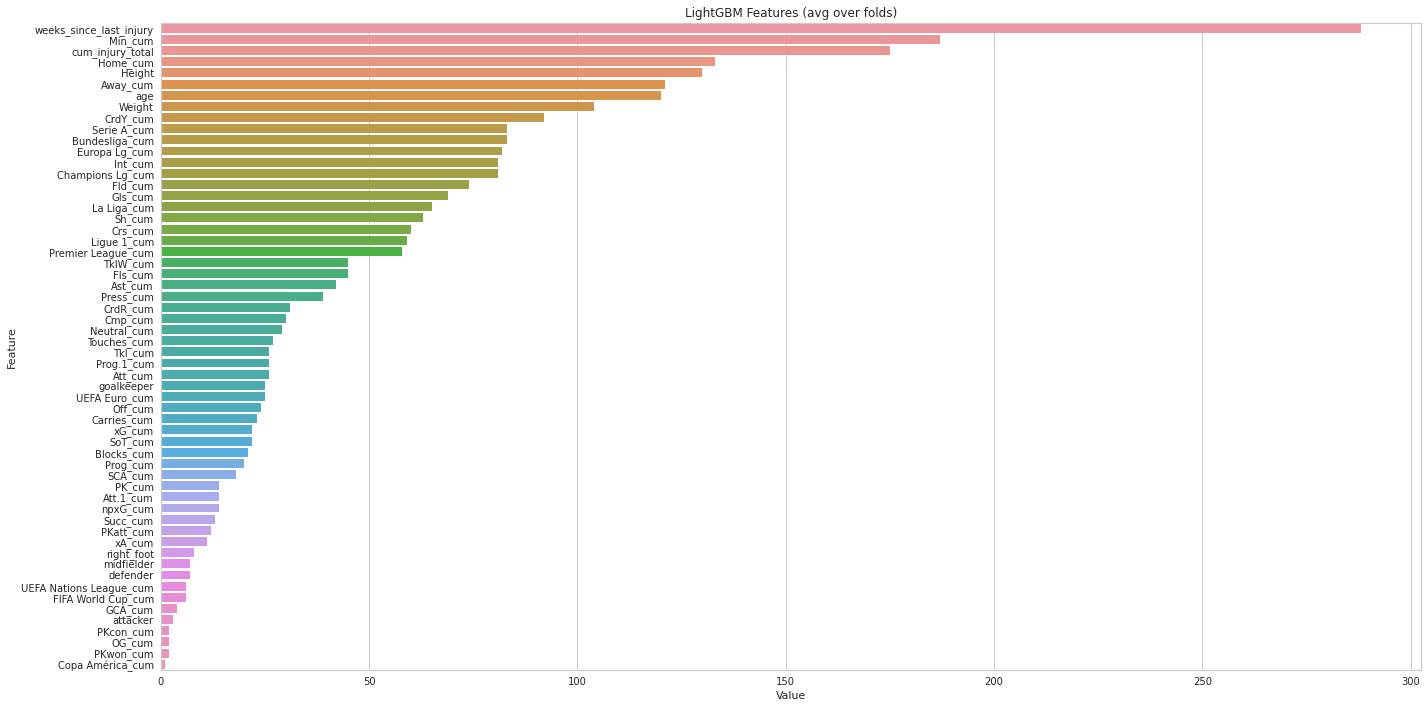

<Figure size 576x396 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

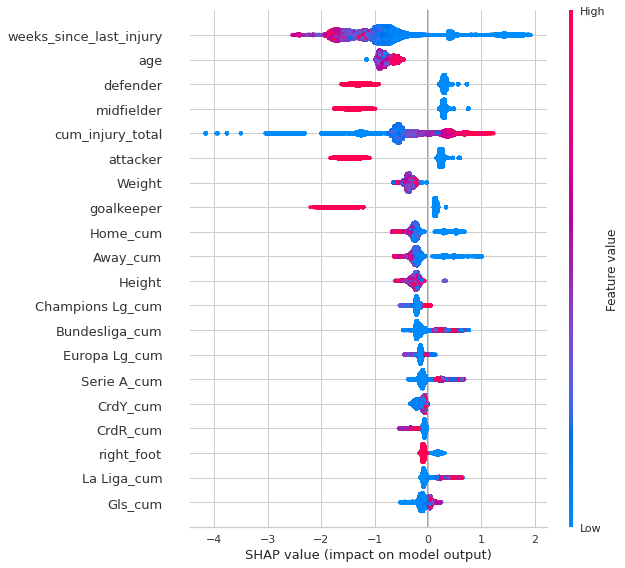

In [18]:
interpret_model(clf)

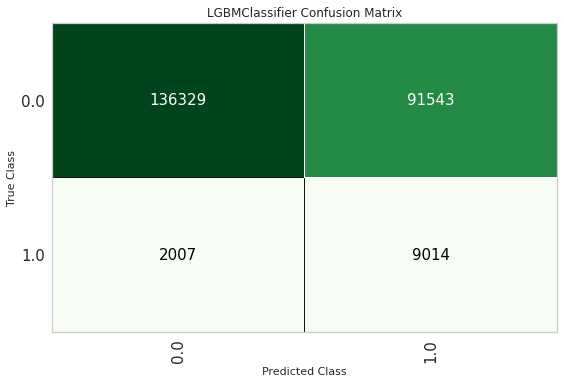

In [41]:
plot_model(clf,'confusion_matrix')

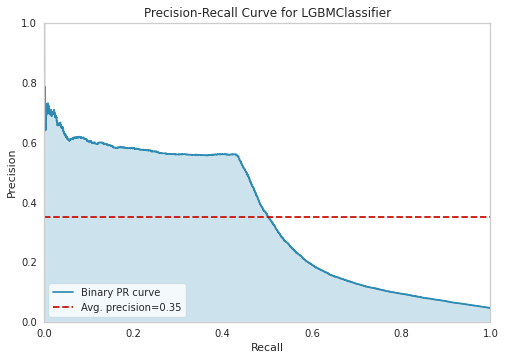

In [43]:
plot_model(clf,'pr')

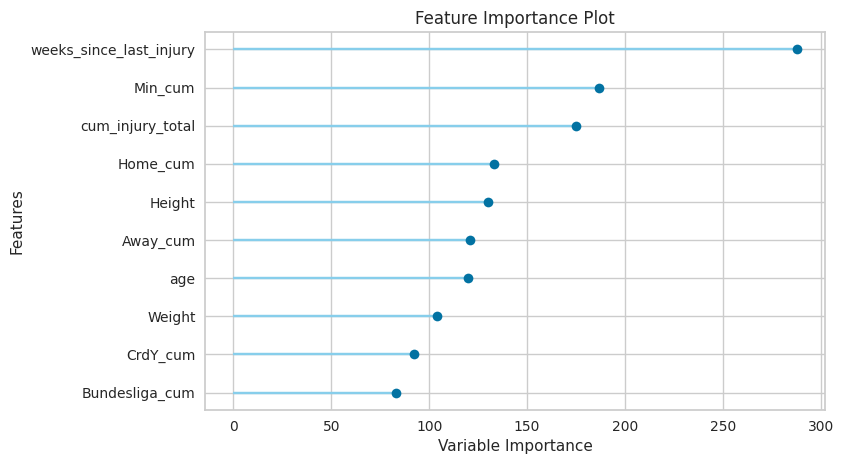

In [44]:
plot_model(clf,'feature')

In [45]:
plot_model(clf,'parameter')

,Parameters
boosting_type,gbdt
class_weight,balanced
colsample_bytree,1.0
importance_type,split
learning_rate,0.15
max_depth,-1
min_child_samples,100
min_child_weight,0.001
min_split_gain,0
n_estimators,100


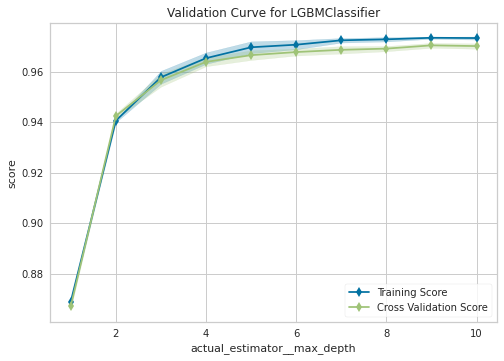

In [47]:
plot_model(clf,'vc')

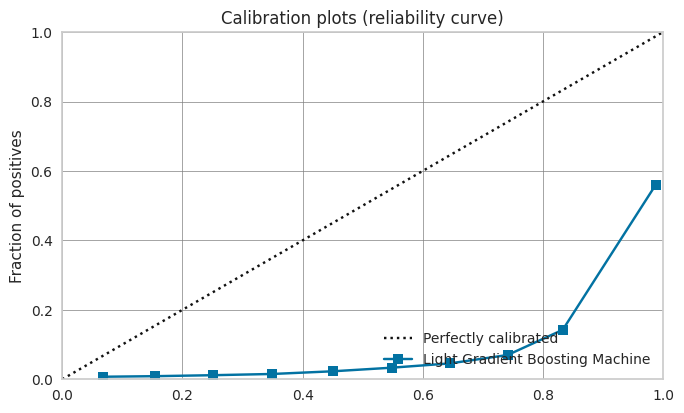

In [48]:
plot_model(clf,'calibration')

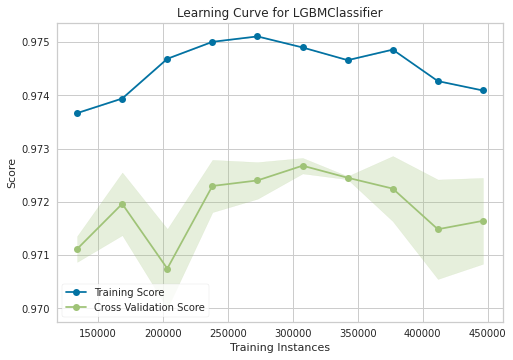

In [49]:
plot_model(clf,'learning')

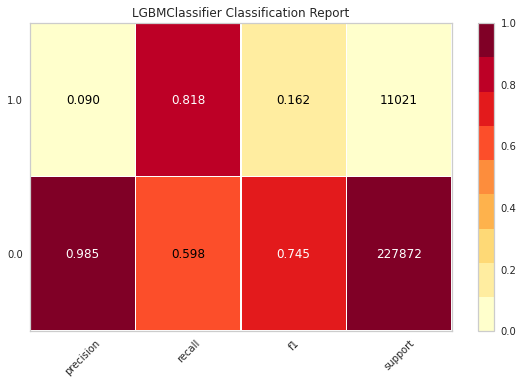

In [51]:
plot_model(clf,'class_report')

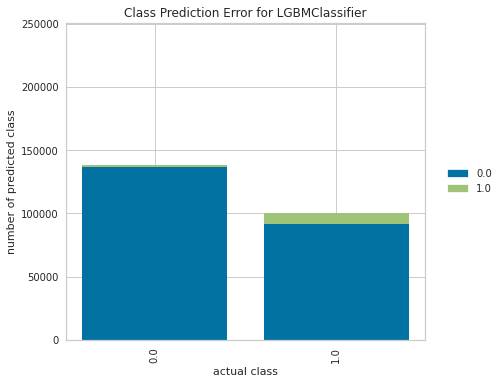

In [52]:
plot_model(clf,'error')

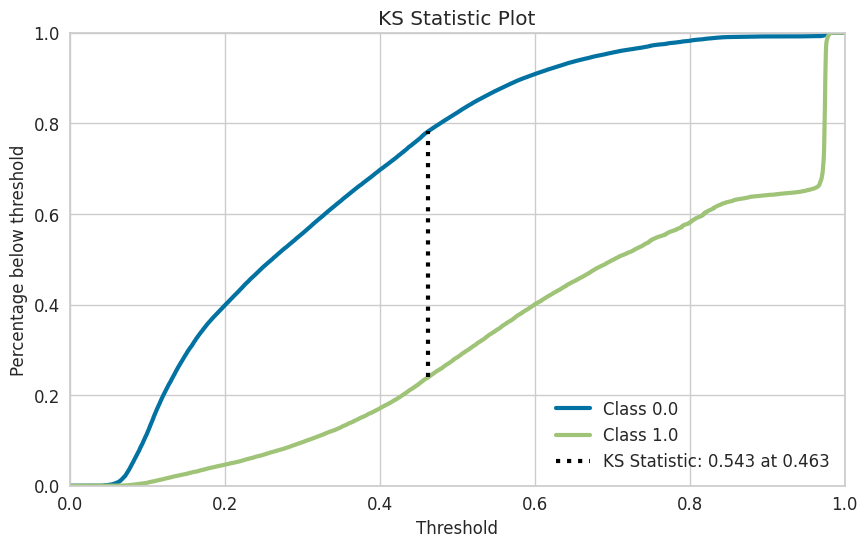

In [62]:
plot_model(clf, plot='ks')

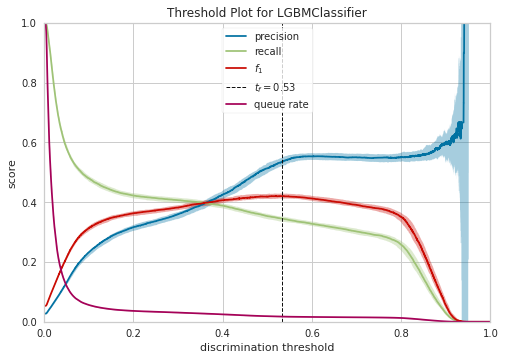

In [63]:
plot_model(clf, plot='threshold')

In [16]:
model_week = load_model('model_1_week_tuned')

Transformation Pipeline and Model Successfully Loaded


In [52]:
week_final

LGBMClassifier(bagging_fraction=0.7, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=140, n_jobs=-1, num_leaves=10, objective=None,
               random_state=2171, reg_alpha=0.0005, reg_lambda=2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
tuned_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
# nan_values = y_test.isna()
# nan_columns = nan_values.any()

# columns_with_nan = y_test.columns[nan_columns].tolist()
# print(columns_with_nan)

<AxesSubplot:xlabel='injured_in_1_week', ylabel='count'>

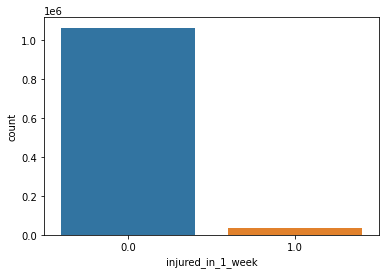

In [17]:
sns.countplot(x=injured_pred,data=df_train)

<AxesSubplot:xlabel='injured_in_1_week', ylabel='count'>

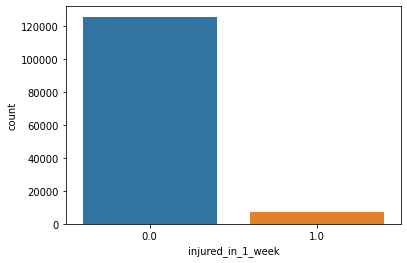

In [18]:
sns.countplot(x=injured_pred,data=df_test)

In [19]:
model_compare = pd.DataFrame(columns=['model', 'precision', 'recall', 'f1-score', 'support'])

# Executing Prediction for 1 Week

In [7]:
# Loading the saved model
model_1_week_tuned = load_model('model_1_week_tuned')

Transformation Pipeline and Model Successfully Loaded


In [8]:
model_1_week_tuned[23]

LGBMClassifier(bagging_fraction=0.8, bagging_freq=0, feature_fraction=0.9,
               learning_rate=0.15, min_child_samples=100, min_split_gain=0,
               num_leaves=30, random_state=4936, reg_alpha=10, reg_lambda=2)

In [9]:
# Cleaning NaNs

dataset_no_nans = dataset.fillna(0)

In [10]:
# Choosing the features we are going to use

dataset_to_predict = dataset_no_nans[['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', \
    'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum', 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', \
    'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum', 'Att_cum', \
    'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', \
    'PKwon_cum', 'PKcon_cum', 'Serie A_cum', 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', \
    'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum', 'Copa América_cum', 'Away_cum', 'Home_cum', \
    'Neutral_cum']]

In [11]:
#Using saved model to predict injuries for 1 year

predicted_injuries = model_1_week_tuned[23].predict(dataset_to_predict)

In [12]:
# Assigning the complet y target to y_target variable

y_target = list(y_train).append(list(y_test))

In [13]:
# Creating predictions_df to include the whole dataset plus predicted injuries and actual injures

predictions_df = dataset_to_predict
predictions_df['predicted_injuries'] = predicted_injuries
predictions_df['actual_injuries'] = y_target

In [14]:
# Merging the complete dataset with the predictions of the model

dataset_with_prediction = pd.merge(dataset, predictions_df['predicted_injuries'], left_index=True, right_index=True)


In [15]:
# Picking the columns we are going to keep

dataset_with_prediction = dataset_with_prediction[['FBRefID', 'name', 'date', 'Min', 'Position:', 'cum_week', 'defender', 'attacker', 'midfielder', 'goalkeeper', \
    'cum_injury_in_1_week', 'cum_injury_in_4_week',  'cum_injury_in_12_week', 'cum_injury_in_26_week', 'cum_injury_in_52_week', 'Min_cum', \
    'predicted_injuries']]

In [16]:
# Creating unique_predicted_injuries to filter out repeated injuries

dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 1) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 1), 'unique_predicted_injuries'] = 0
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 1) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 0), 'unique_predicted_injuries'] = 1
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 0) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 0), 'unique_predicted_injuries'] = 0
dataset_with_prediction.loc[(dataset_with_prediction['predicted_injuries'] == 0) & (dataset_with_prediction['predicted_injuries']. \
    shift(1) == 1), 'unique_predicted_injuries'] = 0

In [17]:
# Getting the accumulated sum of predicted injuries by player

dataset_with_prediction['cum_predicted_injuries'] = dataset_with_prediction.groupby(by=['name'])['unique_predicted_injuries'].cumsum()

In [18]:
# Saving dataframe to parquet file

dataset_with_prediction.to_parquet('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Files for Interactive Prediction Section/dataset_with_prediction_1_week.parquet')

In [18]:
# Picking player to forecast

picked_player_df = dataset_with_prediction[dataset_with_prediction['name'] == 'Neymar']

In [19]:
# Picking the features we are going to use

picked_player_df = picked_player_df[['FBRefID', 'name', 'date', 'Min', 'Position:', 'cum_week', 'defender','attacker', 'midfielder', \
    'goalkeeper', 'cum_injury_in_1_week', 'cum_injury_in_4_week', 'cum_injury_in_12_week', 'cum_injury_in_26_week', 'cum_injury_in_52_week', \
    'Min_cum', 'unique_predicted_injuries']]

In [20]:
# Function to Forecast players injuries and plot a chart

def forecast_it(weeks, df):
    df.reset_index(inplace=True)
    final_index = df.index.max()
    pos = 'cum_injury_in_'+str(weeks)+'_week'
    for n in range(weeks,0,-1): 
        df.loc[final_index-n+1, pos] = ''
    df.loc[df[pos] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = df[pos].shift(1) 
    df.loc[df['single_injury_prediction_in_'+str(weeks)+'_week'] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = \
        df['unique_predicted_injuries']
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['single_injury_prediction_in_'+str(weeks)+'_week'].cumsum()
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_prediction_in_'+str(weeks)+'_week'].fillna('')
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_in_'+str(weeks)+'_week']
    
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'type_for_'+str(weeks)] = 'Actual Injuries'
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] == "", 'type_for_'+str(weeks)] = 'Predicted Injuries'

    extra_point = df[df['type_for_'+str(weeks)] == 'Actual Injuries'].tail(1)
    extra_point['type_for_'+str(weeks)] = 'Predicted Injuries'
    df = pd.concat([df, extra_point])

    df_final = df[len(df)-85:].sort_index()

    domain_min = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].min()-5
    domain_max = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].max()+5

    chart = alt.Chart(df_final).mark_line().encode(x=alt.X('date', timeUnit='yearmonthdate', axis=alt.Axis(tickCount=4)), \
        y=alt.Y('cum_injury_prediction_in_'+str(weeks)+'_week', \
        scale=alt.Scale(domain=[domain_min, domain_max])), color=alt.Color('type_for_'+str(weeks)), strokeDash=alt.condition(
        alt.datum.symbol == 'type_for_'+str(weeks), alt.value([5, 5]), alt.value([0]))). \
        properties(title = str(df['name'].iloc[0])+"'s Injury Prediction for "+str(weeks)+" weeks", width=800, height=300)
    
    return chart


In [23]:
#Forecasting 1 Week

result_1_weeks = forecast_it(1, picked_player_df)

In [24]:
result_1_weeks

alt.Chart(...)